# **Naive Bayes Classifier**

Naive Bayes classifiers are a collection of classification algorithms based on Bayes' Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

By [Muhammad Huzaifa Shahbaz](https://www.linkedin.com/in/mhuzaifadev)

## **Importing libraries**

We will import Pandas as *pd*, train_test_split from sklearn.model_selection, confusion_matrix & accuracy_score from sklearn.metrics and GaussianNB from sklearn.naive_bayes.

In [3]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## **DataFraming**

Read .csv data into a Dataframe 

In [4]:
data = pd.read_csv("bank_2.csv")
print(data.head())
print(data.describe())
print(data.corr())

   age  job  marital  education  default  balance  housing  loan  contact  \
0   30   77       17         21       31     1787       41    51       61   
1   33   78       17         22       31     4789       42    52       61   
2   35   79       16         23       31     1350       42    51       61   
3   30   79       17         23       31     1476       42    52       63   
4   59   80       17         22       31        0       42    51       63   

   day  month  duration  campaign  pdays  previous  poutcome  color  
0   19     10        79         1      1         0        74     91  
1   11      5       220         1    339         4        71     91  
2   16      4       185         1    330         1        71     91  
3    3      6       199         4      1         0        74     91  
4    5      5       226         1      1         0        74     91  
               age          job      marital    education      default  \
count  4521.000000  4521.000000  4521.00000

## **Features Extraction**

Extracting features and splitting data into test and train.

In [5]:
data.features = data[['age','job','marital', 'education', 'default','balance', 'housing', 'loan','contact','day','month','duration','campaign', 'pdays','previous', 'poutcome','color']]
#data.target = data.color
data.target=data['color']
feature_train, feature_test, target_train, target_test = train_test_split(data.features,data.target)

C:\Users\ABDULA~1\AppData\Local\Temp/ipykernel_12108/1377649769.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.features = data[['age','job','marital', 'education', 'default','balance', 'housing', 'loan','contact','day','month','duration','campaign', 'pdays','previous', 'poutcome','color']]
C:\Users\ABDULA~1\AppData\Local\Temp/ipykernel_12108/1377649769.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.target=data['color']


## **Training the Model**

We are using GaussianNB model as imported from sklearn.naive_bayes library and then it's being trained on feature_train and target_train

In [6]:
model = GaussianNB()
fitModel = model.fit(feature_train, target_train)
predictions = fitModel.predict(feature_test)

In [7]:
# Creating a function to report confusion metrics
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

    fpr, tpr, thresholds = metrics.roc_curve(target_test,predictions,pos_label=91)

    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for bank classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)

## **Printing an Error Matrix and Accuracy Score**

[[985   0]
 [  0 146]]
1.0
True Positives: 146
True Negatives: 985
False Positives: 0
False Negatives: 0
--------------------------------------------------
Accuracy: 1.0
Mis-Classification: 0.0
Sensitivity: 1.0
Specificity: 1.0
Precision: 1.0
f_1 Score: 1.0
None


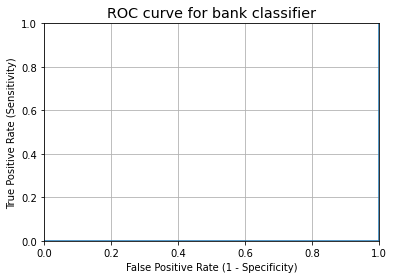

In [8]:
print(confusion_matrix(target_test,predictions))
print(accuracy_score(target_test,predictions))
print(confusion_metrics(confusion_matrix(target_test,predictions)))